<a href="https://colab.research.google.com/github/claredavies/ArtificialIntelligience/blob/main/AIGroupAssignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [26]:
 !pip install -U scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [27]:
import numpy as np
import pandas as pd
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt
from google.colab import files
from itertools import product
import collections
from collections import OrderedDict

# Read in data

In [28]:
uploaded = files.upload()
df_readin = pd.read_csv('DatasetAI.csv', names=["x1", "x2", "y"])

Saving DatasetAI.csv to DatasetAI.csv


In [29]:
print(df_readin.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      50 non-null     float64
 1   x2      50 non-null     float64
 2   y       50 non-null     float64
dtypes: float64(3)
memory usage: 1.3 KB
None


# Linguistic Labels

In [30]:
def createMembershipFunctionsDF(range_values, k):
  label_list = []
  centroid_list = []
  start_list = []
  end_list = []

  for x in range(1, (k+1), 1):
    slot = (np.max(range_values) - np.min(range_values))/(k-1)
    start_centroid = np.min(range_values)
    if x == 0:
      start = 0
      centroid = start_centroid
      end = start + slot

    if x == k:
      centroid = np.max(range_values)
      end = k
      start = end - slot

    else:
      centroid = start_centroid + (x-1)*slot
      start = centroid - slot
      end = centroid + slot

    label_list.append(x)
    centroid_list.append(centroid)
    start_list.append(start)
    end_list.append(end)
  
  df = pd.DataFrame(list(zip(label_list, centroid_list, start_list, end_list)),
               columns =['label', 'centroid', 'start', 'end'])
  
  return df

In [31]:
# Generate universe variables
K = 5
x1 = np.arange(1, 6, 1)
x2 = np.arange(1, 6, 1)
y  = np.arange(1, 6, 1)

x1_df = createMembershipFunctionsDF(x1, K)
x2_df = createMembershipFunctionsDF(x2, K)
y_df = createMembershipFunctionsDF(y, K)


In [32]:
print(x1_df)

   label  centroid  start  end
0      1       1.0    0.0  2.0
1      2       2.0    1.0  3.0
2      3       3.0    2.0  4.0
3      4       4.0    3.0  5.0
4      5       5.0    4.0  5.0


# Visualize these universes and membership functions

In [33]:
# Generate fuzzy membership functions
# start point, y point, end point
x1_s = fuzz.trimf(x1, [x1_df["start"][0], x1_df["centroid"][0], x1_df["end"][0]])
x1_ms = fuzz.trimf(x1, [x1_df["start"][1], x1_df["centroid"][1], x1_df["end"][1]])
x1_m = fuzz.trimf(x1, [x1_df["start"][2], x1_df["centroid"][2], x1_df["end"][2]])
x1_ml = fuzz.trimf(x1, [x1_df["start"][3], x1_df["centroid"][3], x1_df["end"][3]])
x1_l = fuzz.trimf(x1, [x1_df["start"][4], x1_df["centroid"][4], x1_df["end"][4]])

x2_s = fuzz.trimf(x2, [x2_df["start"][0], x2_df["centroid"][0], x2_df["end"][0]])
x2_ms = fuzz.trimf(x2, [x2_df["start"][1], x2_df["centroid"][1], x2_df["end"][1]])
x2_m = fuzz.trimf(x2, [x2_df["start"][2], x2_df["centroid"][2], x2_df["end"][2]])
x2_ml = fuzz.trimf(x2, [x2_df["start"][3], x2_df["centroid"][3], x2_df["end"][3]])
x2_l = fuzz.trimf(x2, [x2_df["start"][4], x2_df["centroid"][4], x2_df["end"][4]])

y_s = fuzz.trimf(x1, [x1_df["start"][0], x1_df["centroid"][0], x1_df["end"][0]])
y_ms =  fuzz.trimf(x1, [x1_df["start"][1], x1_df["centroid"][1], x1_df["end"][1]])
y_m = fuzz.trimf(x1, [x1_df["start"][2], x1_df["centroid"][2], x1_df["end"][2]])
y_ml = fuzz.trimf(x1, [x1_df["start"][3], x1_df["centroid"][3], x1_df["end"][3]])
y_l = fuzz.trimf(x1, [x1_df["start"][4], x1_df["centroid"][4], x1_df["end"][4]])

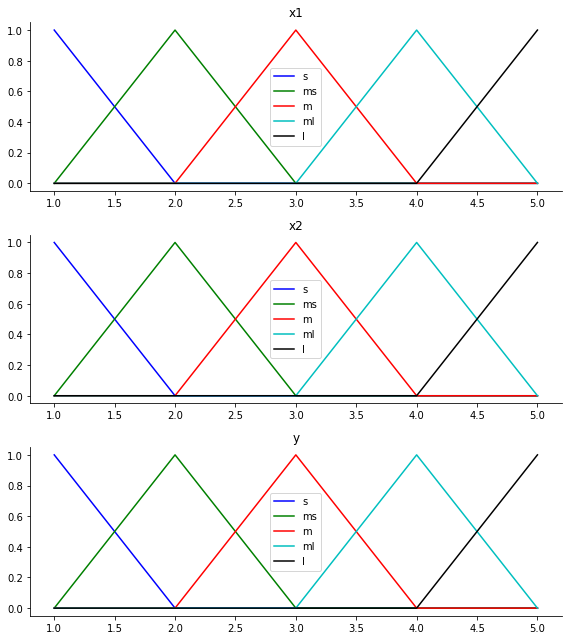

In [34]:
# Visualize these universes and membership functions
fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(8, 9))

ax0.plot(x1, x1_s, 'b', linewidth=1.5, label='s')
ax0.plot(x1, x1_ms, 'g', linewidth=1.5, label='ms')
ax0.plot(x1, x1_m, 'r', linewidth=1.5, label='m')
ax0.plot(x1, x1_ml, 'c', linewidth=1.5, label='ml')
ax0.plot(x1, x1_l, 'k', linewidth=1.5, label='l')
ax0.set_title('x1')
ax0.legend()


ax1.plot(x2, x2_s, 'b', linewidth=1.5, label='s')
ax1.plot(x2, x2_ms, 'g', linewidth=1.5, label='ms')
ax1.plot(x2, x2_m, 'r', linewidth=1.5, label='m')
ax1.plot(x2, x2_ml, 'c', linewidth=1.5, label='ml')
ax1.plot(x2, x2_l, 'k', linewidth=1.5, label='l')
ax1.set_title('x2')
ax1.legend()

ax2.plot(y, y_s, 'b', linewidth=1.5, label='s')
ax2.plot(y, y_ms, 'g', linewidth=1.5, label='ms')
ax2.plot(y, y_m, 'r', linewidth=1.5, label='m')
ax2.plot(y, y_ml, 'c', linewidth=1.5, label='ml')
ax2.plot(y, y_l, 'k', linewidth=1.5, label='l')
ax2.set_title('y')
ax2.legend()

# Turn off top/right axes
for ax in (ax0, ax1, ax2):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

# Create primary and secondary tables

In [45]:
data = [[1, 1], [2, 2], [3, 3],[4, 4],[5, 5]]
df = pd.DataFrame(data, columns=['x1', 'x2'])


In [46]:
print(df)

   x1  x2
0   1   1
1   2   2
2   3   3
3   4   4
4   5   5


Generate all combinations of the catergorical variables

In [47]:
# apply product method
result_list = list(product(df['x1'], df['x2']))

Turn combination list into dataframe and add y column

In [48]:
df = pd.DataFrame (result_list, columns = ['x1', 'x2'])
df["y"] = np.nan

Create primary and secondary tables

In [49]:
df_primary = df.copy()
df_secondary = df.copy()

In [50]:
print(df_primary)

    x1  x2   y
0    1   1 NaN
1    1   2 NaN
2    1   3 NaN
3    1   4 NaN
4    1   5 NaN
5    2   1 NaN
6    2   2 NaN
7    2   3 NaN
8    2   4 NaN
9    2   5 NaN
10   3   1 NaN
11   3   2 NaN
12   3   3 NaN
13   3   4 NaN
14   3   5 NaN
15   4   1 NaN
16   4   2 NaN
17   4   3 NaN
18   4   4 NaN
19   4   5 NaN
20   5   1 NaN
21   5   2 NaN
22   5   3 NaN
23   5   4 NaN
24   5   5 NaN


# Populate Primary and Secondary Table

In [55]:
dictionary_distance_x1 = {}
dictionary_distance_x2 = {}
dictionary_distance_y = {}

for i, row in df_readin.iterrows():

  for j, row in x1_df.iterrows():
    dist_x1 = abs(df_readin['x1'][i] - x1_df['centroid'][j])
    x1_label = x1_df['label'][j]
    dictionary_distance_x1[x1_label] = dist_x1

    dist_x2 = abs(df_readin['x2'][i] - x2_df['centroid'][j])
    x2_label = x2_df["label"][j]
    dictionary_distance_x2[x2_label] = dist_x2

    dist_y = abs(df_readin['y'][i] - y_df['centroid'][j])
    y_label = y_df['label'][j]
    dictionary_distance_y[y_label] = dist_y
  
  # print(dictionary_distance_x1)
  sorted_list_x1 = sorted(dictionary_distance_x1, key=dictionary_distance_x1.get)
  sorted_list_x2 = sorted(dictionary_distance_x2, key=dictionary_distance_x2.get)
  sorted_list_y = sorted(dictionary_distance_y, key=dictionary_distance_y.get)

  primary_x1 = sorted_list_x1[0]
  primary_x2 = sorted_list_x2[0]
  primary_y = sorted_list_y[0]

  secondary_x1 = sorted_list_x1[1]
  secondary_x2 = sorted_list_x2[1]
  secondary_y = sorted_list_y[1]
  
  print("point x1: " + str(df_readin['x1'][i]))
  print("point x2: " + str(df_readin['x2'][i]))
  print("point y: " + str(df_readin['y'][i]))

  print("primary x1: " + str(primary_x1))
  print("primary x2: " + str(primary_x2))
  print("primary y: " + str(primary_y))

  print("secodary x1: " + str(secondary_x1))
  print("secodary x2: " + str(secondary_x2))
  print("secodary y: " + str(secondary_y))

  c_secondary = df_secondary['x1'].eq(secondary_x1) & df_secondary['x2'].eq(secondary_x2)
  df_secondary.loc[c_secondary,'y']=secondary_y

  c_primary = df_primary['x1'].eq(primary_x1) & df_primary['x2'].eq(primary_x2)
  df_primary.loc[c_primary,'y']=primary_y

point x1: 1.4
point x2: 1.8
point y: 3.7
primary x1: 1
primary x2: 2
primary y: 4
secodary x1: 2
secodary x2: 1
secodary y: 3
point x1: 4.28
point x2: 4.96
point y: 1.31
primary x1: 4
primary x2: 5
primary y: 1
secodary x1: 5
secodary x2: 4
secodary y: 2
point x1: 1.18
point x2: 4.29
point y: 3.35
primary x1: 1
primary x2: 4
primary y: 3
secodary x1: 2
secodary x2: 5
secodary y: 4
point x1: 1.96
point x2: 1.9
point y: 2.7
primary x1: 2
primary x2: 2
primary y: 3
secodary x1: 1
secodary x2: 1
secodary y: 2
point x1: 1.85
point x2: 1.43
point y: 3.52
primary x1: 2
primary x2: 1
primary y: 4
secodary x1: 1
secodary x2: 2
secodary y: 3
point x1: 3.66
point x2: 1.6
point y: 2.46
primary x1: 4
primary x2: 2
primary y: 2
secodary x1: 3
secodary x2: 1
secodary y: 3
point x1: 3.64
point x2: 2.14
point y: 1.95
primary x1: 4
primary x2: 2
primary y: 2
secodary x1: 3
secodary x2: 3
secodary y: 1
point x1: 4.51
point x2: 1.52
point y: 2.51
primary x1: 5
primary x2: 2
primary y: 3
secodary x1: 4
sec

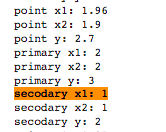

In [52]:
print(df_secondary.head())

   x1  x2    y
0   1   1  2.0
1   1   2  4.0
2   1   3  2.0
3   1   4  3.0
4   1   5  1.0


In [57]:
s_c_primary = df_primary['x1'].eq(1) 

df_primary.loc[df_primary['x1'].eq(1),'x1']= 's'
df_primary.loc[df_primary['x1'].eq(2),'x1']= 'ms'
df_primary.loc[df_primary['x1'].eq(3),'x1']= 'm'
df_primary.loc[df_primary['x1'].eq(4),'x1']= 'ml'
df_primary.loc[df_primary['x1'].eq(5),'x1']= 'l'

df_primary.loc[df_primary['x2'].eq(1),'x2']= 's'
df_primary.loc[df_primary['x2'].eq(2),'x2']= 'ms'
df_primary.loc[df_primary['x2'].eq(3),'x2']= 'm'
df_primary.loc[df_primary['x2'].eq(4),'x2']= 'ml'
df_primary.loc[df_primary['x2'].eq(5),'x2']= 'l'

df_primary.loc[df_primary['y'].eq(1),'y']= 's'
df_primary.loc[df_primary['y'].eq(2),'y']= 'ms'
df_primary.loc[df_primary['y'].eq(3),'y']= 'm'
df_primary.loc[df_primary['y'].eq(4),'y']= 'ml'
df_primary.loc[df_primary['y'].eq(5),'y']= 'l'

print(df_primary.head(50))

    x1  x2    y
0    s   s    l
1    s  ms   ml
2    s   m    m
3    s  ml   ms
4    s   l  NaN
5   ms   s    m
6   ms  ms   ms
7   ms   m   ms
8   ms  ml   ms
9   ms   l  NaN
10   m   s    m
11   m  ms   ms
12   m   m  NaN
13   m  ml   ms
14   m   l    s
15  ml   s    m
16  ml  ms   ms
17  ml   m  NaN
18  ml  ml    s
19  ml   l    s
20   l   s    m
21   l  ms    m
22   l   m   ms
23   l  ml    s
24   l   l    s


In [56]:
s_c_secondary = df_secondary['x1'].eq(1) 

df_secondary.loc[df_secondary['x1'].eq(1),'x1']= 's'
df_secondary.loc[df_secondary['x1'].eq(2),'x1']= 'ms'
df_secondary.loc[df_secondary['x1'].eq(3),'x1']= 'm'
df_secondary.loc[df_secondary['x1'].eq(4),'x1']= 'ml'
df_secondary.loc[df_secondary['x1'].eq(5),'x1']= 'l'

df_secondary.loc[df_secondary['x2'].eq(1),'x2']= 's'
df_secondary.loc[df_secondary['x2'].eq(2),'x2']= 'ms'
df_secondary.loc[df_secondary['x2'].eq(3),'x2']= 'm'
df_secondary.loc[df_secondary['x2'].eq(4),'x2']= 'ml'
df_secondary.loc[df_secondary['x2'].eq(5),'x2']= 'l'

df_secondary.loc[df_secondary['y'].eq(1),'y']= 's'
df_secondary.loc[df_secondary['y'].eq(2),'y']= 'ms'
df_secondary.loc[df_secondary['y'].eq(3),'y']= 'm'
df_secondary.loc[df_secondary['y'].eq(4),'y']= 'ml'
df_secondary.loc[df_secondary['y'].eq(5),'y']= 'l'

print(df_secondary.head(50))

    x1  x2    y
0    s   s   ms
1    s  ms   ml
2    s   m   ms
3    s  ml    m
4    s   l    s
5   ms   s    m
6   ms  ms   ml
7   ms   m  NaN
8   ms  ml  NaN
9   ms   l    s
10   m   s    m
11   m  ms   ml
12   m   m    m
13   m  ml  NaN
14   m   l  NaN
15  ml   s   ms
16  ml  ms    s
17  ml   m   ms
18  ml  ml   ms
19  ml   l   ms
20   l   s    m
21   l  ms  NaN
22   l   m   ms
23   l  ml   ms
24   l   l  NaN


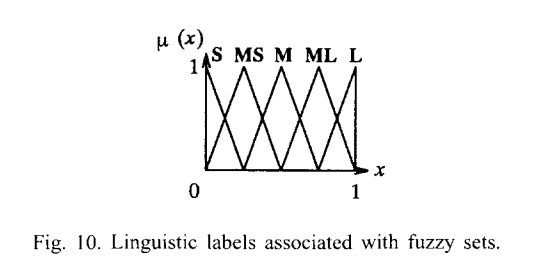

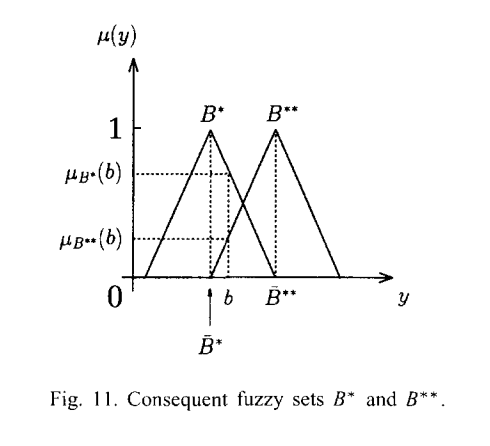